### Cross-Validation

Cross-validation can be used to select the optimal degree of a polynomial for regression, preventing overfitting. The Scikit-learn library is particularly suited for this task, as it contains functions both for generating polynomial features and for performing cross-validation.

Here's a general example of how you might approach this.

The code below loops over a range of polynomial degrees and for each degree, generates polynomial features and applies linear regression in a pipeline. It uses 5-fold cross-validation to compute a score for each model, and then selects the polynomial degree that has the highest mean cross-validation score.

This approach allows you to use cross-validation to balance model complexity (as controlled by the degree of the polynomial) with the goal of achieving the best predictive performance.

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate synthetic data
np.random.seed(0)
xdata = np.sort(np.random.rand(100)).reshape(-1, 1)
ydata = xdata**3 - 2*xdata**2 + xdata + np.random.randn(100).reshape(-1, 1)  # cubic relationship with some noise

# Loop over degrees to test
degrees = np.arange(1, 10)
cross_val_scores = []

for degree in degrees:
    # Create a pipeline that creates polynomial features, then applies linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Use cross-validation to compute the mean score across multiple splits of the data
    score = cross_val_score(model, xdata, ydata, cv=5).mean()
    cross_val_scores.append(score)

# Choose the degree with the highest cross-validation score
best_degree = degrees[np.argmax(cross_val_scores)]
print(f"The best degree is {best_degree}")


The best degree is 1


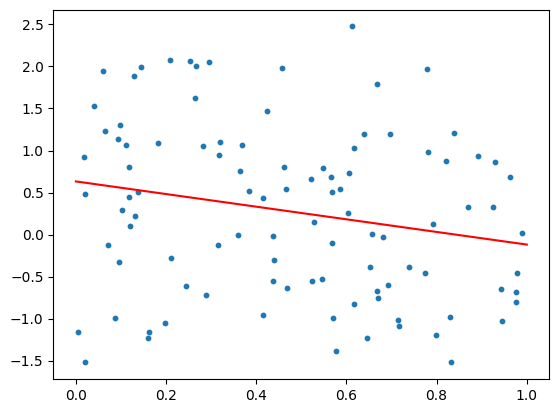

In [3]:
from matplotlib import pyplot as plt
# plot the data and the best fit curve
plt.scatter(xdata, ydata, s=10)
x = np.linspace(0, 1, 100).reshape(-1, 1)
y = make_pipeline(PolynomialFeatures(best_degree), LinearRegression()).fit(xdata, ydata).predict(x)
plt.plot(x, y, color='r')
plt.show()


The cross_val_score function in scikit-learn uses a scoring metric that depends on the estimator used. For regression estimators like LinearRegression(), it uses the R-squared metric by default.

If you want to specify a different scoring metric, you can pass it as a string to the scoring parameter of cross_val_score. For example, to use mean squared error, you could write:

```python
cross_val_score(model, xdata, ydata, cv=5, scoring='neg_mean_squared_error')
```

Note that the neg_mean_squared_error scoring function actually returns the negative of the mean squared error, since cross_val_score is designed so that higher scores are better. Thus, if you use this scoring metric, you should keep in mind that a score of 0 is the best possible score, and values less than 0 indicate errors.